In [ ]:
# Cell 1: Install dependencies
!pip install numpy pandas scipy matplotlib pillow opencv-python tqdm -q

print("✓ All dependencies installed!")

✓ All dependencies installed!


In [ ]:
# Cell 3: Verify files exist
import os

files_to_check = [
    'generate_training_data.py',
    'apply_spwvd_transform.py',
    'augment_data.py'
]

print("Checking files...")
for file in files_to_check:
    if os.path.exists(file):
        size = os.path.getsize(file)
        print(f"✓ {file} ({size:,} bytes)")
    else:
        print(f"✗ {file} NOT FOUND!")

Checking files...
✓ generate_training_data.py (16,324 bytes)
✓ apply_spwvd_transform.py (4,779 bytes)
✓ augment_data.py (2,651 bytes)


In [ ]:
# Cell 4: Generate training data (192 experiments)
print("="*70)
print("STEP 1: Generating Raw Time-Series Data")
print("="*70)

!python generate_training_data.py

print("\n" + "="*70)
print("✓ Raw data generation complete!")
print("="*70)

STEP 1: Generating Raw Time-Series Data

BORING BAR TRAINING DATA GENERATOR FOR SHUFFLE-BiLSTM

Configuration:
  Sampling frequency: 40 kHz
  Duration per experiment: 1.0 s
  Samples per experiment: 40,000

Parameter Ranges:
  Cutting speeds: [100, 200, 300, 400] m/min
  Feed rates: [0.1, 0.2, 0.3, 0.4] mm/rev
  Cutting depths: [0.1, 0.2, 0.3, 0.4] mm
  Overhangs: [420, 480, 540] mm
Dataset will be saved to: /content/boring_bar_dataset

GENERATING FULL BORING BAR DATASET

Generating 8 'stable' experiments...

Generating 8 'transition' experiments...

Generating 8 'severe' experiments...

✓ Saved full dataset: boring_bar_dataset/boring_bar_full_dataset.csv
  Total samples: 960,000
Traceback (most recent call last):
  File "/content/generate_training_data.py", line 441, in <module>
    main()
  File "/content/generate_training_data.py", line 424, in main
    df_all = generator.generate_full_dataset(experiments_per_state=8)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [ ]:
# Cell 5: Verify generated data
import pandas as pd
import os

print("Checking generated dataset...")

# Check main dataset
if os.path.exists('boring_bar_dataset/boring_bar_full_dataset.csv'):
    df = pd.read_csv('boring_bar_dataset/boring_bar_full_dataset.csv')
    print(f"\n✓ Full dataset loaded")
    print(f"  Total samples: {len(df):,}")
    print(f"  Total experiments: {df['exp_id'].nunique()}")
    print(f"  Size: {os.path.getsize('boring_bar_dataset/boring_bar_full_dataset.csv')/1e6:.1f} MB")

    print("\n  Class distribution:")
    print(df.groupby('state')['exp_id'].nunique())

    print("\n  Sample data:")
    print(df.head())
else:
    print("✗ Dataset not found!")

# List all generated files
print("\n\nGenerated files:")
for root, dirs, files in os.walk('boring_bar_dataset'):
    level = root.replace('boring_bar_dataset', '').count(os.sep)
    indent = ' ' * 2 * level
    print(f'{indent}{os.path.basename(root)}/')
    sub_indent = ' ' * 2 * (level + 1)
    for file in files[:5]:  # Show first 5 files
        print(f'{sub_indent}{file}')
    if len(files) > 5:
        print(f'{sub_indent}... and {len(files)-5} more files')

Checking generated dataset...

✓ Full dataset loaded
  Total samples: 960,000
  Total experiments: 24
  Size: 43.5 MB

  Class distribution:
state
severe        8
stable        8
transition    8
Name: exp_id, dtype: int64

  Sample data:
     time_s  accel_x_m_s2    exp_id   state
0  0.000000     26.038955  exp_0000  stable
1  0.000025     37.441681  exp_0000  stable
2  0.000050     50.485260  exp_0000  stable
3  0.000075     51.044211  exp_0000  stable
4  0.000100     50.538112  exp_0000  stable


Generated files:
boring_bar_dataset/
  experiment_metadata.json
  boring_bar_full_dataset.csv


In [ ]:
# Cell 6: Transform to time-frequency images
print("="*70)
print("STEP 2: Applying SPWVD Transformation")
print("="*70)

!python apply_spwvd_transform.py

print("\n" + "="*70)
print("✓ SPWVD transformation complete!")
print("="*70)

STEP 2: Applying SPWVD Transformation

Loading dataset from: boring_bar_dataset/boring_bar_full_dataset.csv
Total experiments to process: 24
Processing experiments: 100% 24/24 [00:02<00:00,  9.92it/s]

✓ Processing complete!
✓ Saved 24 images to: boring_bar_tfr_images
✓ Saved metadata to: boring_bar_tfr_images/processed_metadata.csv

✓ SPWVD transformation complete!


Checking transformed images...
✓ Stable: 8 images
✓ Transition: 8 images
✓ Severe: 8 images

Displaying sample images from each class...


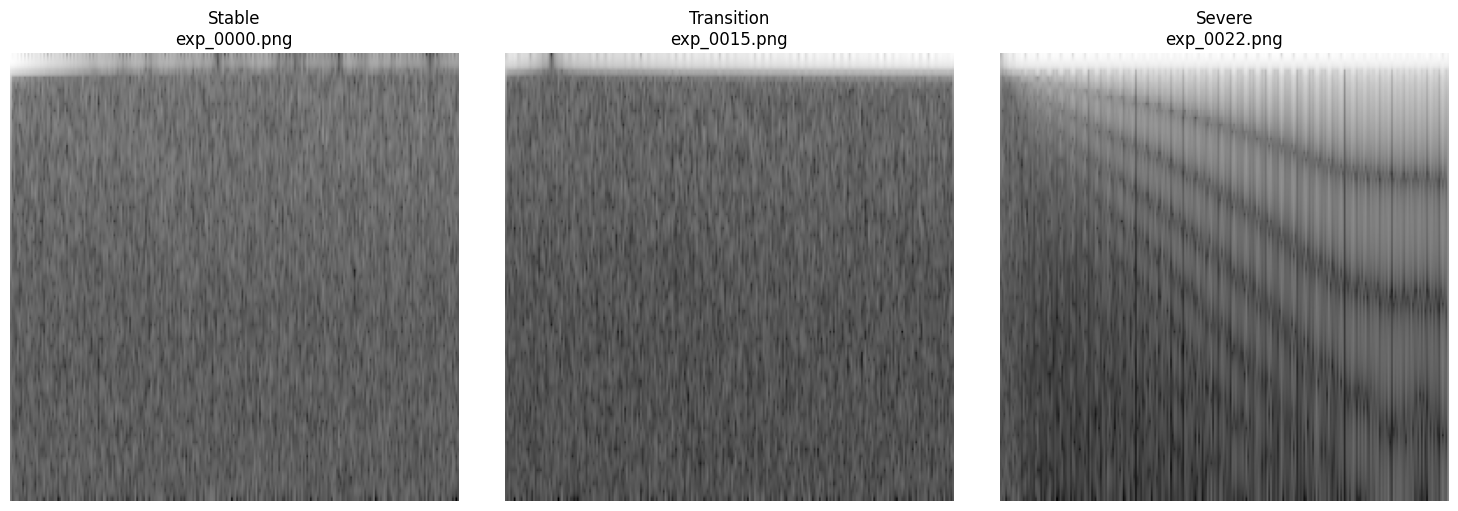


✓ Sample visualization saved as 'sample_tfr_images.png'


In [ ]:
# Cell 7: Check generated images
import os
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

print("Checking transformed images...")

# Count images by class
for state in ['stable', 'transition', 'severe']:
    img_dir = f'boring_bar_tfr_images/{state}'
    if os.path.exists(img_dir):
        images = list(Path(img_dir).glob('*.png'))
        print(f"✓ {state.capitalize()}: {len(images)} images")
    else:
        print(f"✗ {state} folder not found!")

# Display sample images
print("\nDisplaying sample images from each class...")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, state in enumerate(['stable', 'transition', 'severe']):
    img_dir = Path(f'boring_bar_tfr_images/{state}')
    if img_dir.exists():
        # Load first image
        img_path = list(img_dir.glob('*.png'))[0]
        img = Image.open(img_path)

        axes[idx].imshow(img)
        axes[idx].set_title(f'{state.capitalize()}\n{img_path.name}')
        axes[idx].axis('off')

plt.tight_layout()
plt.savefig('sample_tfr_images.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Sample visualization saved as 'sample_tfr_images.png'")

In [ ]:
# Cell 8: Augment dataset to increase size
print("="*70)
print("STEP 3: Data Augmentation (Optional)")
print("="*70)
print("This will create 768 images (192 × 4)")
print()

# Ask user
response = input("Do you want to run augmentation? (yes/no): ")

if response.lower() in ['yes', 'y']:
    !python augment_data.py

    # Verify augmented data
    print("\n\nAugmented dataset summary:")
    for state in ['stable', 'transition', 'severe']:
        aug_dir = f'boring_bar_tfr_augmented/{state}'
        if os.path.exists(aug_dir):
            images = list(Path(aug_dir).glob('*.png'))
            print(f"  {state.capitalize()}: {len(images)} images")

    print("\n✓ Augmentation complete!")
else:
    print("Skipping augmentation.")

STEP 3: Data Augmentation (Optional)
This will create 768 images (192 × 4)

Do you want to run augmentation? (yes/no): yes
Augmenting stable: 100% 8/8 [00:00<00:00, 49.90it/s]
Augmenting transition: 100% 8/8 [00:00<00:00, 34.69it/s]
Augmenting severe: 100% 8/8 [00:00<00:00, 28.33it/s]

✓ Augmentation complete! Output: boring_bar_tfr_augmented


Augmented dataset summary:
  Stable: 32 images
  Transition: 32 images
  Severe: 32 images

✓ Augmentation complete!


In [ ]:
from google.colab import drive

# Mount Google Drive
print("Mounting Google Drive...")
drive.mount('/content/drive')


Mounting Google Drive...
Mounted at /content/drive


In [ ]:
# Cell 10: Save to Google Drive
import shutil
import os

# Create directory in Drive
drive_path = '/content/drive/MyDrive/mantech_dataset'
os.makedirs(drive_path, exist_ok=True)

print(f"\nCopying data to: {drive_path}")

# Copy datasets
print("\n1. Copying raw dataset...")
shutil.copytree('boring_bar_dataset', f'{drive_path}/boring_bar_dataset',
                dirs_exist_ok=True)
print("   ✓ Raw data copied")

print("\n2. Copying time-frequency images...")
shutil.copytree('boring_bar_tfr_images', f'{drive_path}/boring_bar_tfr_images',
                dirs_exist_ok=True)
print("   ✓ TFR images copied")

if os.path.exists('boring_bar_tfr_augmented'):
    print("\n3. Copying augmented images...")
    shutil.copytree('boring_bar_tfr_augmented',
                    f'{drive_path}/boring_bar_tfr_augmented',
                    dirs_exist_ok=True)
    print("   ✓ Augmented images copied")

print("\n" + "="*70)
print("✓ ALL DATA SAVED TO GOOGLE DRIVE!")
print("="*70)
print(f"\nLocation: {drive_path}")
print("\nYou can access this data in future Colab sessions without regenerating!")


Copying data to: /content/drive/MyDrive/mantech_dataset

1. Copying raw dataset...
   ✓ Raw data copied

2. Copying time-frequency images...
   ✓ TFR images copied

3. Copying augmented images...
   ✓ Augmented images copied

✓ ALL DATA SAVED TO GOOGLE DRIVE!

Location: /content/drive/MyDrive/mantech_dataset

You can access this data in future Colab sessions without regenerating!


In [ ]:
# Cell 1
!pip install tensorflow opencv-python scikit-learn seaborn tqdm -q
print("✓ Dependencies installed")

✓ Dependencies installed


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/mantech_dataset')
!ls

boring_bar_dataset  boring_bar_tfr_augmented  boring_bar_tfr_images


In [ ]:
# Cell 4
!ls -la boring_bar_tfr_images/
!echo "Stable images:"
!ls boring_bar_tfr_images/stable/ | wc -l
!echo "Transition images:"
!ls boring_bar_tfr_images/transition/ | wc -l
!echo "Severe images:"
!ls boring_bar_tfr_images/severe/ | wc -l

total 14
-rw------- 1 root root 1480 Nov  5 05:18 processed_metadata.csv
drwx------ 2 root root 4096 Nov  5 05:18 severe
drwx------ 2 root root 4096 Nov  5 05:18 stable
drwx------ 2 root root 4096 Nov  5 05:18 transition
Stable images:
8
Transition images:
8
Severe images:
8


In [ ]:
!python detection_2.py

2025-11-05 05:47:45.888318: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762321665.907639    7387 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762321665.913532    7387 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1762321665.928545    7387 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1762321665.928580    7387 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1762321665.928585    7387 computation_placer.cc:177] computation placer alr

In [ ]:
# Cell 5
!python shuffle_bilstm_chatter_detection.py

2025-11-05 05:41:25.731981: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762321285.751512    4797 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762321285.758311    4797 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1762321285.773459    4797 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1762321285.773483    4797 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1762321285.773488    4797 computation_placer.cc:177] computation placer alr